In [9]:
from ntscraper import Nitter
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from multiprocessing import Pool, cpu_count
import time

scraper = Nitter(log_level=1,skip_instance_check=False)
analyzer = SentimentIntensityAnalyzer()

Testing instances: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]


In [ ]:
#result1 = scraper.get_tweets("Fed",'hashtag',number=20)

20-Mar-25 09:58:39 - No instance specified, using random instance https://nitter.privacyredirect.com
20-Mar-25 09:58:46 - Current stats for Fed: 15 tweets, 0 threads...
20-Mar-25 09:58:51 - Current stats for Fed: 20 tweets, 0 threads...


In [ ]:
#result2 = scraper.get_tweets("Powell",mode='term',language="en",number=10)
time.sleep(5)  

20-Mar-25 09:59:10 - No instance specified, using random instance https://nitter.privacyredirect.com
20-Mar-25 09:59:17 - Current stats for Powell: 10 tweets, 0 threads...


In [17]:
result3 = scraper.get_tweets("Interest Rates",'term',language="en",number=500)
time.sleep(5)  

20-Mar-25 10:07:40 - No instance specified, using random instance https://nitter.privacyredirect.com
20-Mar-25 10:07:47 - Current stats for Interest Rates: 9 tweets, 0 threads...
20-Mar-25 10:07:51 - Current stats for Interest Rates: 16 tweets, 0 threads...
20-Mar-25 10:07:56 - Current stats for Interest Rates: 28 tweets, 0 threads...
20-Mar-25 10:08:01 - Current stats for Interest Rates: 37 tweets, 0 threads...
20-Mar-25 10:08:05 - Current stats for Interest Rates: 47 tweets, 0 threads...
20-Mar-25 10:08:10 - Current stats for Interest Rates: 59 tweets, 0 threads...
20-Mar-25 10:08:15 - Current stats for Interest Rates: 67 tweets, 0 threads...
20-Mar-25 10:08:20 - Current stats for Interest Rates: 85 tweets, 0 threads...
20-Mar-25 10:08:25 - Current stats for Interest Rates: 104 tweets, 0 threads...
20-Mar-25 10:08:29 - Current stats for Interest Rates: 122 tweets, 0 threads...
20-Mar-25 10:08:34 - Current stats for Interest Rates: 136 tweets, 0 threads...
20-Mar-25 10:08:38 - Current

In [ ]:
#result4 = scraper.get_tweets("Trump",mode='term',language="en",number=10)
time.sleep(5) 

20-Mar-25 10:06:02 - No instance specified, using random instance https://nitter.privacyredirect.com
20-Mar-25 10:06:09 - Current stats for Trump: 10 tweets, 0 threads...


In [ ]:
#result5 = scraper.get_tweets("Inflation",mode='term',language="en",number=10)


In [ ]:
#tweets = result1.get("tweets", []) + result2.get("tweets", []) + result3.get("tweets", []) + result4.get("tweets", []) + result5.get("tweets", [])

In [18]:
tweets = result3.get("tweets", [])
print(tweets)

[{'link': 'https://twitter.com/BurelleDon/status/1902738812398105081#m', 'text': 'For the sake of gold and silver. Can we get a short lived dip on interest rates to 0% to 1%. But 5% after that I’m fine with for the long run. Overall 5% is fare across the board.', 'user': {'name': 'gold&silver spartan👑🦍💰', 'username': '@BurelleDon', 'profile_id': '1848747349117423616', 'avatar': 'https://pbs.twimg.com/profile_images/1848747349117423616/rrsDiB4A_bigger.jpg'}, 'date': 'Mar 20, 2025 · 3:07 PM UTC', 'is-retweet': False, 'is-pinned': False, 'external-link': '', 'replying-to': ['@DavidBCollum'], 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/SenWarren/status/1902452052426408390#m', 'text': "I’ve been saying all along that Trump's chaotic approach to tariffs is giving companies cover to raise prices on you.   And it’s also resulting in the Fed keeping interest rates high for longer — 

In [19]:
# Process into a DataFrame
cleaned_data = []

for tweet in tweets:
    user = tweet.get("user", {})
    stats = tweet.get("stats", {})
    text = tweet.get("text", "")

    sentiment = analyzer.polarity_scores(text)["compound"]

    cleaned_data.append({
        "username": user.get("username", ""),
        "content": tweet.get("text", ""),
        "date": tweet.get("date", ""),
        "sentiment": sentiment,
        "likes": stats.get("likes", 0),
        "retweets": stats.get("retweets", 0),
        "comments": stats.get("comments", 0),
        "quotes": stats.get("quotes", 0),
    })

# Convert to DataFrame
df = pd.DataFrame(cleaned_data)

# Optional: Convert date to datetime#
#df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Save to CSV
df.to_csv("tweets_output_final.csv", index=False, encoding="utf-8")

print("✅ Saved to tweets_output_final.csv")

✅ Saved to tweets_output_final.csv


In [20]:
df.head(10)

,username,content,date,sentiment,likes,retweets,comments,quotes
0,@BurelleDon,For the sake of gold and silver. Can we get a ...,"Mar 20, 2025 · 3:07 PM UTC",0.4939,0,0,0,0
1,@SenWarren,I’ve been saying all along that Trump's chaoti...,"Mar 19, 2025 · 8:08 PM UTC",0.4404,708,246,391,18
2,@ColeFusionHQ,Labour are messing things up: * Raise taxes o...,"Mar 20, 2025 · 3:06 PM UTC",0.2500,0,0,0,0
3,@APompliano,The Federal Reserve made a mistake yesterday a...,"Mar 20, 2025 · 1:07 PM UTC",-0.1280,1021,97,241,7
4,@RSBNetwork,Trump blasts Federal Reserve for not cutting i...,"Mar 20, 2025 · 3:00 PM UTC",-0.2755,30,12,2,1
5,@RhanaLavigne35,Do you think Trump's influence on the market i...,"Mar 20, 2025 · 3:06 PM UTC",0.7351,0,0,0,0
6,@sevendotnews,"🚨 TRUMP VS. FED: Trump slams Federal Reserve, ...","Mar 20, 2025 · 3:06 PM UTC",0.5423,0,0,0,0
7,@truthma1,When both Elizabeth Warren & Donald Trump sque...,"Mar 20, 2025 · 3:06 PM UTC",0.6705,0,0,0,0
8,@ProudElephantUS,President Trump issues a new statement asking ...,"Mar 20, 2025 · 2:38 AM UTC",0.2263,212,58,10,1
9,@Artemisfornow,BREAKING: Bank of England holds interest rates...,"Mar 20, 2025 · 12:12 PM UTC",-0.8793,856,248,65,11


In [21]:
# Step 1: Convert comments and likes to numeric (in case they're strings)
df["likes"] = pd.to_numeric(df["likes"], errors="coerce")
df["comments"] = pd.to_numeric(df["comments"], errors="coerce")

# Step 2: Avoid division by zero – only keep rows with comments > 0
df_filtered = df[df["comments"] > 0].copy()

# Step 3: Compute the like-to-comment ratio
df_filtered["like_comment_ratio"] = df_filtered["likes"] / df_filtered["comments"]

# Step 4: Filter for posts with high engagement ratio (e.g., 5x or more)
threshold = 5
df_result = df_filtered[df_filtered["like_comment_ratio"] >= threshold]

In [22]:
df_result.head(10)

,username,content,date,sentiment,likes,retweets,comments,quotes,like_comment_ratio
4,@RSBNetwork,Trump blasts Federal Reserve for not cutting i...,"Mar 20, 2025 · 3:00 PM UTC",-0.2755,30,12,2,1,15.000000
8,@ProudElephantUS,President Trump issues a new statement asking ...,"Mar 20, 2025 · 2:38 AM UTC",0.2263,212,58,10,1,21.200000
9,@Artemisfornow,BREAKING: Bank of England holds interest rates...,"Mar 20, 2025 · 12:12 PM UTC",-0.8793,856,248,65,11,13.169231
13,@WatcherGuru,BREAKING: 🇺🇸 Federal Reserve leaves interest r...,"Mar 19, 2025 · 6:00 PM UTC",0.4588,8754,1232,446,132,19.627803
17,@TheTNHoller,⚡️JUST NOW: Rep. Johnny Shaw (D-Bolivar) threa...,"Mar 18, 2025 · 7:36 PM UTC",-0.7579,2332,1056,117,35,19.931624
25,@johnredwood,The Bank of England and government are letting...,"Mar 20, 2025 · 5:46 AM UTC",0.4280,302,89,27,4,11.185185
26,@JustinWolfers,The Fed acknowledges a sharp increase in uncer...,"Mar 19, 2025 · 7:00 PM UTC",0.4404,164,43,10,2,16.400000
30,@ShaziGoalie,"""Ontario Mortgage Delinquencies Surge Past $1 ...","Jun 12, 2024 · 11:32 AM UTC",0.0258,418,121,27,7,15.481481
31,@TheBitcoinConf,"RON PAUL: ""The Federal Reserve is unconstituti...","Mar 20, 2025 · 2:22 PM UTC",0.5994,129,32,20,1,6.450000
35,@davidfrum,If you were hoping for lower interest rates .....,"Mar 20, 2025 · 12:19 PM UTC",0.9201,210,69,10,0,21.000000


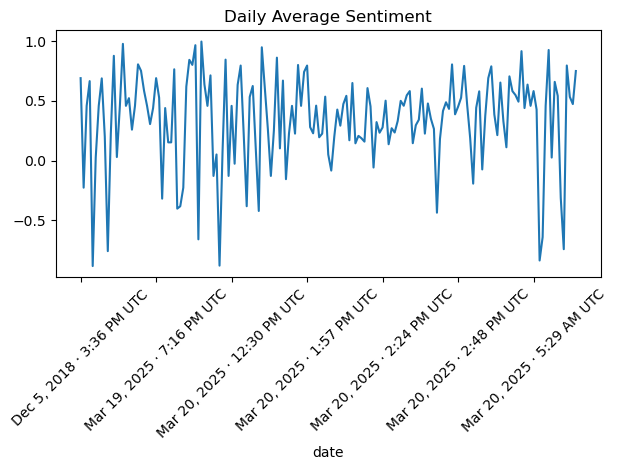

In [24]:
import matplotlib.pyplot as plt

# Sentiment over time
df.groupby("date")["sentiment"].mean().plot(kind='line', title="Daily Average Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eyuel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eyuel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


🔑 Top Keywords:
rates: 551
interest: 537
fed: 112
inflation: 97
year: 93
reserve: 84
federal: 81
bank: 75
trump: 70
lets: 68
mortgages: 68
rate: 67
offer: 67
lenders: 64
talk: 63
fixedrate: 63
special: 63
provisions: 63
facilitate: 63
refinancing: 63


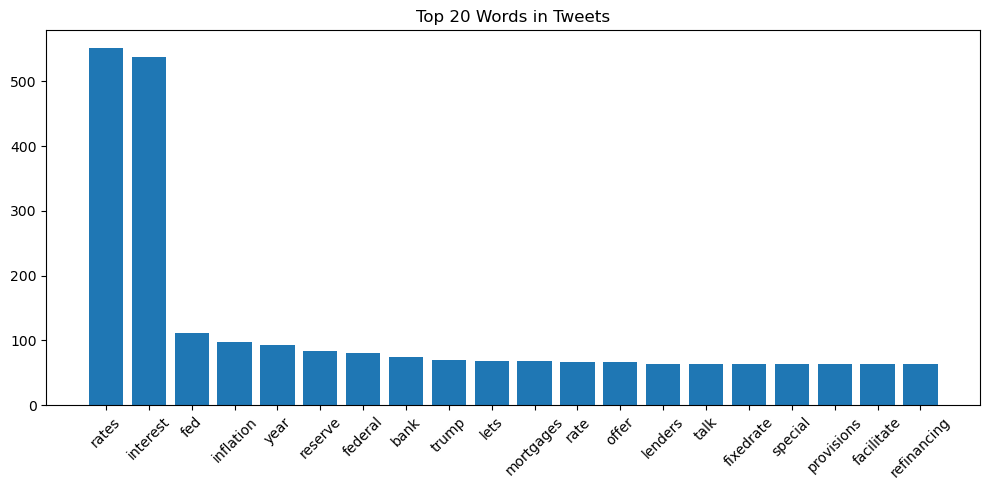

In [25]:
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download("punkt")
nltk.download("stopwords")

# Load your DataFrame
# df = pd.read_csv("tweets_output_final.csv")  # or already loaded

# Preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)     # Remove mentions
    text = re.sub(r"#", "", text)        # Remove hashtag symbol
    text = re.sub(r"[^a-z\s]", "", text) # Remove punctuation/numbers
    return text

df["clean_content"] = df["content"].astype(str).apply(clean_text)


stop_words = set(stopwords.words("english"))
all_words = []

for text in df["clean_content"]:
    words = word_tokenize(text)
    filtered = [w for w in words if w not in stop_words and len(w) > 2]
    all_words.extend(filtered)


top_words = Counter(all_words).most_common(20)
print("🔑 Top Keywords:")
for word, freq in top_words:
    print(f"{word}: {freq}")


import matplotlib.pyplot as plt

words, freqs = zip(*top_words)
plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.title("Top 20 Words in Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

